In [36]:
# Bag of words Analysis
import os
import pandas as pd
import csv
from collections import defaultdict
import matplotlib.pyplot as plt



In [37]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [38]:
directory = '0325updated.task1train(626p)'

bag_ow = defaultdict(int)
voc = []
doc0 = []
counter = 0
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(os.path.join(directory,filename)) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                if(not is_number(row[-1])):
                    # Add our word to our bag_ow
                    bag_ow[row[-1]] += 1
                    # Add it to our vocabulary
                    voc.append(row[-1])
                    if counter == 0:
                        # Just example of creating document
                        doc0.append(row[-1])
            counter += 1
                
                    
sorted_by_occurrence_bag_ow = sorted(bag_ow.items(), key=lambda item: item[1])
print(sorted_by_occurrence_bag_ow[-10:])

[(':', 291), ('QTY', 349), ('AMOUNT', 354), ('CHANGE', 366), ('TOTAL', 367), ('TAX INVOICE', 371), ('CASH', 497), ('GST SUMMARY', 509), ('SR', 675), ('', 983)]


In [39]:
# print(sorted_by_occurrence_bag_ow)
def plot_n_occurrences_word(n, sorted_bag_ow):
    '''Takes in an integer n and a sorted_by_
    occurrence bag of words and returns a plot
    of the n words that appear the most'''
    words_values = sorted_bag_ow[-n:]
    words = []
    values = []
    for i,j in words_values:
        if i in " %'':":
            continue
        words.append(i)
        values.append(j)
    
    plt.bar(words, values)
    plt.xticks(rotation='vertical')
    plt.title(label = "Words with most occurrences")

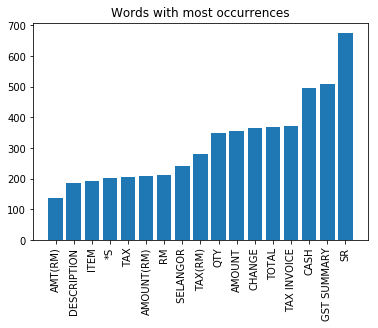

In [40]:
plot_n_occurrences_word(20, sorted_by_occurrence_bag_ow)

In [42]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Not finished yet!

tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(doc0)

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 
 
# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
telecommunications,0.529188
digi,0.529188
bhd,0.469000
sdn,0.469000
10,0.000000
pos,0.000000
login,0.000000
mobile,0.000000
name,0.000000
nice,0.000000


### Analyzing words' locations

* First we will try to visualize boxes in an image to get an idea of how coordinates work.
* We will get the common locations for important words like "total" "amount" "change"

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from matplotlib.pyplot import figure

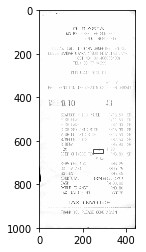

In [32]:
# Coordinates for TOTAL: 245,639,293,639,293,658,245,658,TOTAL
# In other words: upper left x = 245, y = 639 width = 48, height = 19 
# Not finished yet!
directory = '0325updated.task1train(626p)'
file_image = 'X00016469612.jpg'
im = np.array(Image.open(os.path.join(directory,filename)), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im, extent=[0,442, 1000, 0])

# Create a Rectangle patch
rect = patches.Rectangle((245, 639),48,19,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# plt.figure(num=None, figsize=(2000, 1000), dpi=1, facecolor='w', edgecolor='k')
plt.show()

In [34]:
key_words = ["TOTAL", "AMOUNT", "CASH", "QTY"]
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(os.path.join(directory,filename)) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                if row[-1] in key_words:
                    print(row[:-1], row[-1])


['308', '709', '367', '709', '367', '743', '308', '743'] QTY
['647', '709', '764', '709', '764', '742', '647', '742'] AMOUNT
['32', '1015', '115', '1015', '115', '1050', '32', '1050'] CASH
['296', '784', '354', '784', '354', '822', '296', '822'] QTY
['585', '782', '674', '782', '674', '826', '585', '826'] TOTAL
['103', '975', '182', '975', '182', '1031', '103', '1031'] TOTAL
['167', '1035', '230', '1035', '230', '1064', '167', '1064'] CASH
['153', '1595', '245', '1595', '245', '1632', '153', '1632'] TOTAL
['253', '2142', '346', '2142', '346', '2179', '253', '2179'] TOTAL
['88', '1062', '172', '1062', '172', '1099', '88', '1099'] CASH
['82', '486', '127', '486', '127', '517', '82', '517'] QTY
['568', '490', '629', '490', '629', '515', '568', '515'] TOTAL
['327', '631', '393', '631', '393', '657', '327', '657'] TOTAL
['83', '762', '162', '762', '162', '785', '83', '785'] CASH
['80', '975', '143', '975', '143', '1001', '80', '1001'] TOTAL
['570', '883', '630', '883', '630', '907', '570', 

['2401', '2649', '2515', '2649', '2515', '2719', '2401', '2719'] QTY
['2491', '3649', '2693', '3649', '2693', '3719', '2491', '3719'] CASH
['530', '686', '634', '686', '634', '713', '530', '713'] AMOUNT
['36', '955', '102', '955', '102', '984', '36', '984'] CASH
['18', '1245', '101', '1245', '101', '1280', '18', '1280'] TOTAL
['13', '1404', '87', '1404', '87', '1437', '13', '1437'] CASH
['249', '611', '293', '611', '293', '637', '249', '637'] QTY
['526', '612', '623', '612', '623', '632', '526', '632'] AMOUNT
['51', '969', '112', '969', '112', '992', '51', '992'] CASH
['16', '847', '74', '847', '74', '873', '16', '873'] CASH
['332', '723', '374', '723', '374', '751', '332', '751'] QTY
['541', '724', '634', '724', '634', '749', '541', '749'] AMOUNT
['104', '1109', '247', '1109', '247', '1136', '104', '1136'] TOTAL
['98', '1140', '220', '1140', '220', '1168', '98', '1168'] CASH
['319', '1291', '412', '1291', '412', '1318', '319', '1318'] AMOUNT
['47', '406', '103', '406', '103', '431', '

['275', '423', '450', '423', '450', '477', '275', '477'] CASH
['518', '629', '607', '629', '607', '675', '518', '675'] QTY
['936', '613', '1111', '613', '1111', '644', '936', '644'] AMOUNT
['268', '1173', '447', '1173', '447', '1215', '268', '1215'] TOTAL
['266', '1234', '410', '1234', '410', '1275', '266', '1275'] CASH
['732', '1598', '900', '1598', '900', '1634', '732', '1634'] AMOUNT
['88', '577', '261', '577', '261', '634', '88', '634'] CASH
['327', '785', '413', '785', '413', '828', '327', '828'] QTY
['748', '771', '918', '771', '918', '801', '748', '801'] AMOUNT
['73', '1462', '252', '1462', '252', '1506', '73', '1506'] TOTAL
['71', '1524', '214', '1524', '214', '1567', '71', '1567'] CASH
['532', '1891', '702', '1891', '702', '1924', '532', '1924'] AMOUNT
['125', '529', '166', '529', '166', '559', '125', '559'] QTY
['593', '537', '656', '537', '656', '560', '593', '560'] TOTAL
['353', '783', '421', '783', '421', '804', '353', '804'] TOTAL
['120', '935', '195', '935', '195', '960'

['549', '1200', '628', '1200', '628', '1237', '549', '1237'] CASH
['40', '1018', '110', '1018', '110', '1050', '40', '1050'] CASH
['101', '474', '146', '474', '146', '503', '101', '503'] QTY
['570', '490', '629', '490', '629', '516', '570', '516'] TOTAL
['333', '712', '396', '712', '396', '738', '333', '738'] TOTAL
['93', '830', '172', '830', '172', '858', '93', '858'] CASH
['88', '1047', '150', '1047', '150', '1072', '88', '1072'] TOTAL
['563', '967', '622', '967', '622', '993', '563', '993'] TOTAL
['98', '655', '150', '655', '150', '687', '98', '687'] QTY
['506', '612', '620', '612', '620', '636', '506', '636'] AMOUNT
['131', '1079', '192', '1079', '192', '1110', '131', '1110'] CASH
['30', '1090', '75', '1090', '75', '1117', '30', '1117'] QTY
['472', '1132', '538', '1132', '538', '1156', '472', '1156'] TOTAL
['471', '1221', '535', '1221', '535', '1244', '471', '1244'] CASH
['114', '967', '207', '967', '207', '1002', '114', '1002'] TOTAL
['112', '1008', '193', '1008', '193', '1041', '